# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data_ = pd.read_csv("train_new_data.csv")
resource_data_ = pd.read_csv("resources.csv")

In [3]:
project_data=project_data_.head(25000)
resource_data=resource_data_.head(25000)

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (25000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (25000, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

preprocessing school state

In [8]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

preprocessing teacher prefix

In [9]:
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
prefix_dict = dict(my_counter)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))

preprocessing project grade category

In [10]:
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
pgc_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    pgc_list.append(temp.strip())
    
project_data['clean_pgc'] = pgc_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_pgc'].values:
    my_counter.update(word.split())

pgc_dict = dict(my_counter)
sorted_pgc_dict = dict(sorted(pgc_dict.items(), key=lambda kv: kv[1]))

In [11]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.   
1           3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.   
2           4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.   
3           5  p063374  403c6783e9286e51ab318fba40f8d729           Mrs.   
4           6  p103285  4e156c5fb3eea2531601c8736f3751a7           Mrs.   

  school_state project_submitted_datetime  \
0           NV           18-11-2016 14:45   
1           NC           12-08-2016 15:42   
2           CA           06-08-2016 09:09   
3           DE           05-11-2016 10:01   
4           MO           31-08-2016 00:30   

                                       project_title  \
0                           Super Sight Word Centers   
1  \"Kid Inspired\" Equipment to Increase Activit...   
2   We need clean water for our culinary arts class!   
3              Need to Reach Our Virtual  Mentors!!!   
4                              Active Kindergartners   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  My students are the greatest students but are ...   
2  My students are athletes and students who are ...   
3  My kids tell me each day that they want to mak...   
4  Kindergarten is the new first grade. My studen...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  The student's project which is totally \"kid-i...             NaN   
2  For some reason in our kitchen the water comes...             NaN   
3  I started a program called Telementoring in ho...             NaN   
4  With balance discs and stools as flexible seat...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need balls and other activity equi...   
2             NaN  My students need a water filtration system for...   
3             NaN  My students need tablets  in order to communic...   
4             NaN  My students need stability stools and inflatab...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                            16                    0   
2                                            42                    1   
3                                             0                    1   
4                                             1                    1   

                    clean_categories                    clean_subcategories  \
0                  Literacy_Language                               Literacy   
1                      Health_Sports                        Health_Wellness   
2                      Health_Sports                        Health_Wellness   
3  AppliedLearning Literacy_Language  CharacterEducation Literature_Writing   
4                      Health_Sports                        Health_Wellness   

      clean_pgc  
0  GradesPreK-2  
1     Grades3-5  
2     Grades6-8  
3  GradesPreK-2  
4  GradesPreK-2

## 1.3 Text preprocessing

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [13]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.   
1           3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.   

  school_state project_submitted_datetime  \
0           NV           18-11-2016 14:45   
1           NC           12-08-2016 15:42   

                                       project_title  \
0                           Super Sight Word Centers   
1  \"Kid Inspired\" Equipment to Increase Activit...   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  My students are the greatest students but are ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  The student's project which is totally \"kid-i...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need balls and other activity equi...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                            16                    0   

    clean_categories clean_subcategories     clean_pgc  \
0  Literacy_Language            Literacy  GradesPreK-2   
1      Health_Sports     Health_Wellness     Grades3-5   

                                               essay  
0  Most of my kindergarten students come from low...  
1  My students are the greatest students but are ...

Decontracting function for sentence

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=sent.lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 25000/25000 [00:23<00:00, 1050.52it/s]


In [17]:
# after preprocesing
preprocessed_essays[2000]

'bilingual first grade students full joy eager learn classroom place daily growth constant challenge discovery students spend year learning foundations reading writing math order succeed lives quickly becoming independent learners taking information learned apply multiple activities allow use imagination high level thinking skills teacher low income high poverty school district students faced several challenges classroom personal folders used every day reading writing math classes provide students personal space using folders help students focus work not neighbor students able use dividers whole group independent small group time instruction generous donation project improve students self confidence independence donating project not help improve increase student attention focus ultimately help increase academic achievementnannan'

In [18]:
project_data["clean_essays"] = preprocessed_essays

project_data.drop(['essay'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
preprocessed_pt = []
for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_pt.append(title.lower().strip())

100%|██████████| 25000/25000 [00:01<00:00, 20236.37it/s]


In [20]:
project_data["clean_pt"] = preprocessed_pt
project_data.drop(['project_title'], axis=1, inplace=True)

# number of words in title

In [21]:
title_word_count = []
for i in project_data["clean_pt"] :
    j = len(i.split())
    title_word_count.append(j)
project_data["title_word_count"] = title_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.   
1           3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.   
2           4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.   
3           5  p063374  403c6783e9286e51ab318fba40f8d729           Mrs.   
4           6  p103285  4e156c5fb3eea2531601c8736f3751a7           Mrs.   

  school_state project_submitted_datetime  \
0           NV           18-11-2016 14:45   
1           NC           12-08-2016 15:42   
2           CA           06-08-2016 09:09   
3           DE           05-11-2016 10:01   
4           MO           31-08-2016 00:30   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  My students are the greatest students but are ...   
2  My students are athletes and students who are ...   
3  My kids tell me each day that they want to mak...   
4  Kindergarten is the new first grade. My studen...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  The student's project which is totally \"kid-i...             NaN   
2  For some reason in our kitchen the water comes...             NaN   
3  I started a program called Telementoring in ho...             NaN   
4  With balance discs and stools as flexible seat...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need balls and other activity equi...   
2             NaN  My students need a water filtration system for...   
3             NaN  My students need tablets  in order to communic...   
4             NaN  My students need stability stools and inflatab...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                            16                    0   
2                                            42                    1   
3                                             0                    1   
4                                             1                    1   

                    clean_categories                    clean_subcategories  \
0                  Literacy_Language                               Literacy   
1                      Health_Sports                        Health_Wellness   
2                      Health_Sports                        Health_Wellness   
3  AppliedLearning Literacy_Language  CharacterEducation Literature_Writing   
4                      Health_Sports                        Health_Wellness   

      clean_pgc                                       clean_essays  \
0  GradesPreK-2  kindergarten students come low income househol...   
1     Grades3-5  students greatest students socially economical...   
2     Grades6-8  students athletes students interested health p...   
3  GradesPreK-2  kids tell day want make one happy teacher resp...   
4  GradesPreK-2  kindergarten new first grade students held hig...   

                                            clean_pt  title_word_count  
0                           super sight word centers                 4  
1  kid inspired equipment increase activities gai...                 8  
2            we need clean water culinary arts class                 7  
3                     need reach our virtual mentors                 5  
4                              active kindergartners                 2

# number of words in essay

In [22]:
essay_word_count = []
for i in project_data["clean_essays"] :
    j = len(i.split())
    essay_word_count.append(j)
project_data["essay_word_count"] = essay_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.   
1           3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.   
2           4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.   
3           5  p063374  403c6783e9286e51ab318fba40f8d729           Mrs.   
4           6  p103285  4e156c5fb3eea2531601c8736f3751a7           Mrs.   

  school_state project_submitted_datetime  \
0           NV           18-11-2016 14:45   
1           NC           12-08-2016 15:42   
2           CA           06-08-2016 09:09   
3           DE           05-11-2016 10:01   
4           MO           31-08-2016 00:30   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  My students are the greatest students but are ...   
2  My students are athletes and students who are ...   
3  My kids tell me each day that they want to mak...   
4  Kindergarten is the new first grade. My studen...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  The student's project which is totally \"kid-i...             NaN   
2  For some reason in our kitchen the water comes...             NaN   
3  I started a program called Telementoring in ho...             NaN   
4  With balance discs and stools as flexible seat...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need balls and other activity equi...   
2             NaN  My students need a water filtration system for...   
3             NaN  My students need tablets  in order to communic...   
4             NaN  My students need stability stools and inflatab...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            26                    1   
1                                            16                    0   
2                                            42                    1   
3                                             0                    1   
4                                             1                    1   

                    clean_categories                    clean_subcategories  \
0                  Literacy_Language                               Literacy   
1                      Health_Sports                        Health_Wellness   
2                      Health_Sports                        Health_Wellness   
3  AppliedLearning Literacy_Language  CharacterEducation Literature_Writing   
4                      Health_Sports                        Health_Wellness   

      clean_pgc                                       clean_essays  \
0  GradesPreK-2  kindergarten students come low income househol...   
1     Grades3-5  students greatest students socially economical...   
2     Grades6-8  students athletes students interested health p...   
3  GradesPreK-2  kids tell day want make one happy teacher resp...   
4  GradesPreK-2  kindergarten new first grade students held hig...   

                                            clean_pt  title_word_count  \
0                           super sight word centers                 4   
1  kid inspired equipment increase activities gai...                 8   
2            we need clean water culinary arts class                 7   
3                     need reach our virtual mentors                 5   
4                              active kindergartners                 2   

   essay_word_count  
0               156  
1               207  
2                90  
3               101  
4               154

# Calculate Sentiment Scores for the essays

In [23]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [24]:
neg = []
pos = []
neu = []
compound = []
for i in tqdm(project_data["clean_essays"]) :
    j = analyser.polarity_scores(i)['neg']
    k = analyser.polarity_scores(i)['pos']
    l = analyser.polarity_scores(i)['neu']
    m = analyser.polarity_scores(i)['compound']
    neg.append(j)
    pos.append(k)
    neu.append(l)
    compound.append(m)

100%|██████████| 25000/25000 [04:52<00:00, 85.40it/s] 


In [25]:
project_data["neg"] = neg
project_data["pos"] = pos
project_data["neu"] = neu
project_data["compound"] = compound

In [26]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.   
1           3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.   

  school_state project_submitted_datetime  \
0           NV           18-11-2016 14:45   
1           NC           12-08-2016 15:42   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  My students are the greatest students but are ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  The student's project which is totally \"kid-i...             NaN   

  project_essay_4    ...    clean_subcategories     clean_pgc  \
0             NaN    ...               Literacy  GradesPreK-2   
1             NaN    ...        Health_Wellness     Grades3-5   

                                        clean_essays  \
0  kindergarten students come low income househol...   
1  students greatest students socially economical...   

                                            clean_pt title_word_count  \
0                           super sight word centers                4   
1  kid inspired equipment increase activities gai...                8   

  essay_word_count    neg    pos    neu  compound  
0              156  0.061  0.175  0.764    0.9553  
1              207  0.034  0.269  0.697    0.9948  

[2 rows x 24 columns]

In [27]:
project_data=project_data.head(25000)

In [28]:
project_data.shape

(25000, 24)

Splitting data as train ,test and CV

In [29]:
from sklearn.model_selection import train_test_split
S_train, S_test, y_train, y_test = train_test_split(project_data,
project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'
])
S_train, S_cv, y_train, y_cv = train_test_split(S_train, y_train, test_size=0.30, stratify=y_train)

In [30]:
S_train.drop(['project_is_approved'], axis=1, inplace=True)
S_test.drop(['project_is_approved'], axis=1, inplace=True)
S_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [31]:
print(S_train.shape)
print(S_test.shape)
print(S_cv.shape)

(11725, 23)
(8250, 23)
(5025, 23)


## 1.5 Preparing data for models

In [32]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_pgc', 'clean_essays',
       'clean_pt', 'title_word_count', 'essay_word_count', 'neg', 'pos', 'neu',
       'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

 RESPONSE CODING FOR FEATURIZATION

In [33]:
def response_code_dict(alpha,feature,df):
    count=S_train[feature].value_counts()
    resp_code=dict()
    for i,deno in count.items():
        lis=[]
        for j in range(0,2):
            class_count=S_train.loc[(y_train==j) & (S_train[feature]==i) ]
            lis.append((class_count.shape[0]+10*alpha)/deno+(90*alpha))
        resp_code[i]=lis
    return resp_code

def response_code_value(alpha,feature,df):
    
    get_values_dict = response_code_dict(alpha, feature, df)
    value_count = S_train[feature].value_counts()
    get_values_features = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            get_values_features.append(get_values_dict[row[feature]])
        else:
            get_values_features.append([1/2,1/2])
    return get_values_features

VECTORIZING CLEAN CATEGORIES USING RESPONSE CODING

In [34]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_clean_cat_feature_responseCoding = np.array(response_code_value(alpha, "clean_categories", S_train))
# test gene feature
test_clean_cat_feature_responseCoding = np.array(response_code_value(alpha, "clean_categories", S_test))
# cross validation gene feature
cv_clean_cat_feature_responseCoding = np.array(response_code_value(alpha, "clean_categories", S_cv))

In [35]:
print(train_clean_cat_feature_responseCoding.shape)
print(test_clean_cat_feature_responseCoding.shape)
print(cv_clean_cat_feature_responseCoding.shape)

(11725, 2)
(8250, 2)
(5025, 2)


In [36]:
from scipy import sparse

In [37]:
e1=sparse.csr_matrix(train_clean_cat_feature_responseCoding.shape)
e2=sparse.csr_matrix(test_clean_cat_feature_responseCoding.shape)
e3=sparse.csr_matrix(cv_clean_cat_feature_responseCoding.shape)

VECTORIZING CLEAN SUBCATEGORIES USING RESPONSE CODING

In [38]:
train_clean_subcat_feature_responseCoding = np.array(response_code_value(alpha, "clean_subcategories", S_train))
# test gene feature
test_clean_subcat_feature_responseCoding = np.array(response_code_value(alpha, "clean_subcategories", S_test))
# cross validation gene feature
cv_clean_subcat_feature_responseCoding = np.array(response_code_value(alpha, "clean_subcategories", S_cv))

In [39]:
print(train_clean_subcat_feature_responseCoding.shape)
print(test_clean_subcat_feature_responseCoding.shape)
print(cv_clean_subcat_feature_responseCoding.shape)

(11725, 2)
(8250, 2)
(5025, 2)


In [40]:
d1=sparse.csr_matrix(train_clean_subcat_feature_responseCoding)
d2=sparse.csr_matrix(test_clean_subcat_feature_responseCoding)
d3=sparse.csr_matrix(cv_clean_subcat_feature_responseCoding)

VECTORIZING SCHOOL STATE USING RESPONSE CODING

In [41]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
train_state_feature_responseCoding = np.array(response_code_value(alpha, "school_state", S_train))
# test gene feature
test_state_feature_responseCoding = np.array(response_code_value(alpha, "school_state", S_test))
# cross validation gene feature
cv_state_feature_responseCoding = np.array(response_code_value(alpha, "school_state", S_cv))

In [42]:
print(train_state_feature_responseCoding.shape)
print(test_state_feature_responseCoding.shape)
print(cv_state_feature_responseCoding.shape)

(11725, 2)
(8250, 2)
(5025, 2)


In [43]:
c1=sparse.csr_matrix(train_state_feature_responseCoding)
c2=sparse.csr_matrix(test_state_feature_responseCoding)
c3=sparse.csr_matrix(cv_state_feature_responseCoding)

VECTORIZING TEACHER PREFIX USING RESPONSE CODING

In [44]:
train_prefix_feature_responseCoding = np.array(response_code_value(alpha, "teacher_prefix", S_train))
# test gene feature
test_prefix_feature_responseCoding = np.array(response_code_value(alpha, "teacher_prefix", S_test))
# cross validation gene feature
cv_prefix_feature_responseCoding = np.array(response_code_value(alpha, "teacher_prefix", S_cv))

In [45]:
print(train_prefix_feature_responseCoding.shape)
print(test_prefix_feature_responseCoding.shape)
print(cv_prefix_feature_responseCoding.shape)

(11725, 2)
(8250, 2)
(5025, 2)


In [46]:
b1=sparse.csr_matrix(train_prefix_feature_responseCoding)
b2=sparse.csr_matrix(test_prefix_feature_responseCoding)
b3=sparse.csr_matrix(cv_prefix_feature_responseCoding)

VECTORIZING PROJECT GRADE CATEGORY USING RESPONSE CODING

In [47]:
train_clean_pgc_feature_responseCoding = np.array(response_code_value(alpha, "clean_pgc", S_train))
# test gene feature
test_clean_pgc_feature_responseCoding = np.array(response_code_value(alpha, "clean_pgc", S_test))
# cross validation gene feature
cv_clean_pgc_feature_responseCoding = np.array(response_code_value(alpha, "clean_pgc", S_cv))

In [48]:
print(train_clean_pgc_feature_responseCoding.shape)
print(test_clean_pgc_feature_responseCoding.shape)
print(cv_clean_pgc_feature_responseCoding.shape)

(11725, 2)
(8250, 2)
(5025, 2)


In [49]:
from scipy import sparse
a1=sparse.csr_matrix(train_clean_pgc_feature_responseCoding)
a2=sparse.csr_matrix(test_clean_pgc_feature_responseCoding)
a3=sparse.csr_matrix(cv_clean_pgc_feature_responseCoding)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [50]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow = CountVectorizer()
text_bow = vectorizer_bow.fit_transform(S_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow.shape)

Shape of matrix after one hot encoding  (11725, 23885)


In [51]:
text_bow_test = vectorizer_bow.transform(S_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (8250, 23885)


In [52]:
text_bow_cv = vectorizer_bow.transform(S_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (5025, 23885)


In [53]:
vectorizer_title_bow = CountVectorizer()
title_bow_train= vectorizer_title_bow.fit_transform(S_train["clean_pt"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (11725, 5834)


In [54]:
title_bow_test = vectorizer_title_bow.transform(S_test["clean_pt"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (8250, 5834)


In [55]:
title_bow_cv = vectorizer_title_bow.transform(S_cv["clean_pt"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (5025, 5834)


#### 1.5.2.2 TFIDF vectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer()
vectorizer_tfidf_essay.fit(S_train["clean_essays"])
text_tfidf_train = vectorizer_tfidf_essay.transform(S_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (11725, 23885)


In [57]:
text_tfidf_test = vectorizer_tfidf_essay.transform(S_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (8250, 23885)


In [58]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(S_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (5025, 23885)


In [59]:
vectorizer_tfidf_title = TfidfVectorizer()
vectorizer_tfidf_title.fit(S_train["clean_pt"])
title_tfidf_train = vectorizer_tfidf_title.transform(S_train["clean_pt"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (11725, 5834)


In [60]:
title_tfidf_test = vectorizer_tfidf_title.transform(S_test["clean_pt"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (8250, 5834)


In [61]:
title_tfidf_cv = vectorizer_tfidf_title.transform(S_cv["clean_pt"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (5025, 5834)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [62]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')



words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_pt:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




Loading Glove Model


279727it [01:21, 3450.27it/s]


Done. 279727  words loaded!
all the words in the coupus 3566468
the unique words in the coupus 32982
The number of words that are present in both glove vectors and our coupus 28748 ( 87.163 %)
word 2 vec length 28748


In [63]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [64]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 11725/11725 [00:13<00:00, 866.80it/s] 


11725
300


In [65]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 8250/8250 [00:03<00:00, 2062.72it/s]


8250
300


In [66]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 5025/5025 [00:03<00:00, 1627.48it/s]


5025
300


In [67]:
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))

100%|██████████| 11725/11725 [00:00<00:00, 41469.88it/s]


11725
300


In [68]:
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 8250/8250 [00:00<00:00, 27750.87it/s]


8250
300


In [69]:
avg_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_cv.append(vector)

print(len(avg_w2v_title_cv))
print(len(avg_w2v_title_cv[0]))

100%|██████████| 5025/5025 [00:00<00:00, 32228.40it/s]


5025
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [70]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(S_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [71]:
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 11725/11725 [00:39<00:00, 293.87it/s]


11725
300


In [72]:

tfidf_w2v_vectors_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))


100%|██████████| 8250/8250 [00:27<00:00, 298.82it/s]


8250
300


In [73]:

tfidf_w2v_vectors_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 5025/5025 [00:16<00:00, 302.14it/s]


5025
300


In [74]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(S_train["clean_pt"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
tfidf_w2v_ppt_train= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_train["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_ppt_train.append(vector)

print(len(tfidf_w2v_ppt_train))
print(len(tfidf_w2v_ppt_train[0]))

100%|██████████| 11725/11725 [00:00<00:00, 19071.84it/s]


11725
300


In [75]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_w2v_ppt_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_test["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_ppt_test.append(vector)

print(len(tfidf_w2v_ppt_test))
print(len(tfidf_w2v_ppt_test[0]))

100%|██████████| 8250/8250 [00:00<00:00, 18570.85it/s]


8250
300


In [76]:

tfidf_w2v_ppt_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(S_cv["clean_pt"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_ppt_cv.append(vector)

print(len(tfidf_w2v_ppt_cv))
print(len(tfidf_w2v_ppt_cv[0]))

100%|██████████| 5025/5025 [00:00<00:00, 19367.77it/s]


5025
300


### 1.5.3 Vectorizing Numerical features

In [77]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [78]:
S_train = pd.merge(S_train, price_data, on='id', how='left')
S_test = pd.merge(S_test, price_data, on='id', how='left')
S_cv = pd.merge(S_cv, price_data, on='id', how='left')

Normalizing Price

In [79]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

price_scalar = Normalizer()
X=S_train['price'].fillna(S_train['price'].mean())
Y=S_test['price'].fillna(S_test['price'].mean())
Z=S_cv['price'].fillna(S_cv['price'].mean())
price_scalar.fit(X.values.reshape(-1,1)) # finding the mean and standard deviation of this data
price_standardized_train = price_scalar.transform(X.values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(Y.values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(Z.values.reshape(-1, 1))

In [80]:
print(price_standardized_train.shape)
print(price_standardized_test.shape)
print(price_standardized_cv.shape)

(11725, 1)
(8250, 1)
(5025, 1)


Normalizing number of previously posted projects

In [81]:

price_scalar.fit(S_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
prev_project_standardized_train = price_scalar.transform(S_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_project_standardized_test = price_scalar.transform(S_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_project_standardized_cv = price_scalar.transform(S_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [82]:
print(prev_project_standardized_train.shape)
print(prev_project_standardized_test.shape)
print(prev_project_standardized_cv.shape)

(11725, 1)
(8250, 1)
(5025, 1)


Normalizing Quantity

In [83]:


X=S_train['quantity'].fillna(S_train['quantity'].mean())
Y=S_test['quantity'].fillna(S_test['quantity'].mean())
Z=S_cv['quantity'].fillna(S_cv['quantity'].mean())
price_scalar.fit(X.values.reshape(-1,1)) # finding the mean and standard deviation of this data
quantity_standardized_train = price_scalar.transform(X.values.reshape(-1, 1))
quantity_standardized_test = price_scalar.transform(Y.values.reshape(-1, 1))
quantity_standardized_cv = price_scalar.transform(Z.values.reshape(-1, 1))

In [84]:
print(quantity_standardized_train.shape)
print(quantity_standardized_test.shape)
print(quantity_standardized_cv.shape)

(11725, 1)
(8250, 1)
(5025, 1)


normalizing title word count

In [85]:
normalizer = Normalizer()
normalizer.fit(S_train['title_word_count'].values.reshape(-1,1))
title_word_count_train = normalizer.transform(S_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(S_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(S_test['title_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


NORMALIZING ESSAY WORD COUNT

In [86]:
normalizer = Normalizer()
normalizer.fit(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_train = normalizer.transform(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(S_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(S_test['essay_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


In [87]:
normalizer = Normalizer()
normalizer.fit(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_train = normalizer.transform(S_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(S_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(S_test['essay_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


NORMALIZING ESSAY SENTIMENT-POS

In [88]:
normalizer = Normalizer()
normalizer.fit(S_train['pos'].values.reshape(-1,1))
essay_sent_pos_train = normalizer.transform(S_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(S_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(S_test['pos'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


NORMALIZING ESSAY SENTIMEN-NEG

In [89]:
normalizer = Normalizer()
normalizer.fit(S_train['neg'].values.reshape(-1,1))
essay_sent_neg_train = normalizer.transform(S_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(S_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(S_test['neg'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


NORMALIZING ESSAY SENTIMEN-NEU

In [90]:
normalizer = Normalizer()
normalizer.fit(S_train['neu'].values.reshape(-1,1))
essay_sent_neu_train = normalizer.transform(S_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(S_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(S_test['neu'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


NORMALIZING ESSAY SENTIMEN-COMPOUND

In [91]:
normalizer = Normalizer()
normalizer.fit(S_train['compound'].values.reshape(-1,1))
essay_sent_comp_train = normalizer.transform(S_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer.transform(S_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(S_test['compound'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)

After vectorizations
(11725, 1) (11725,)
(5025, 1) (5025,)
(8250, 1) (8250,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

__ Computing Sentiment Scores__

# Assignment 9: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Note:

1.I have used all the datapoints Random forest classifier for 3 vectorization techniques i.e BOW ,TFIDF and avgw2v
2.Since it was taking more than 2 days to compute i restarted my kernel and used 25K datapoints for Random Forest tfidfw2v and for all 4 xgboost classifiers. 3.Response coding was again done on 25K points for train,test and cv separately.

# Feature set 1 using BOW

In [92]:
from scipy.sparse import hstack

In [93]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_BOW_train= hstack((a1,b1,c1,d1,e1,text_bow,title_bow_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(S_BOW_train.shape)

(11725, 29738)


In [94]:
S_BOW_test= hstack((a2,b2,c2,d2,e2,text_bow_test,title_bow_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(S_BOW_test.shape)

(8250, 29738)


In [95]:
S_BOW_cv= hstack((a3,b3,c3,d3,e3,text_bow_cv,title_bow_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv))
print(S_BOW_cv.shape)

(5025, 29738)


In [96]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

finding best hyperparameter using CV

100%|██████████| 7/7 [01:47<00:00, 21.09s/it]


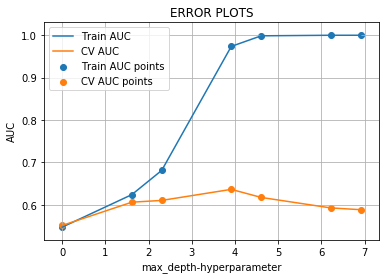

In [153]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
import math
max_depth=[1, 5, 10, 50, 100, 500, 1000]

for i in tqdm(max_depth):
    rfc= RandomForestClassifier(max_depth=i,class_weight="balanced")
    l=rfc.fit(S_BOW_train, y_train)
    y_train_pred = batch_predict(rfc,S_BOW_train)
    y_cv_pred = batch_predict(rfc, S_BOW_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot([math.log(i) for i in max_depth],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in max_depth],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in max_depth],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in max_depth],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("max_depth-hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

using Gridsearch CV for finding best hyperparameter

100%|██████████| 8/8 [1:57:55<00:00, 1570.13s/it]


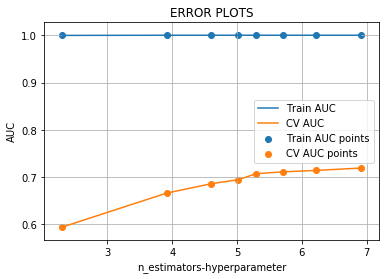

In [155]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
a = []
b = []
import math
n_estimators=[10,50,100,150,200,300,500,1000]

for i in tqdm(n_estimators):
    rfc= RandomForestClassifier(n_estimators=i,class_weight="balanced")
    l=rfc.fit(S_BOW_train, y_train)
    y_train_pred = batch_predict(rfc,S_BOW_train)
    y_cv_pred = batch_predict(rfc, S_BOW_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot([math.log(i) for i in n_estimators],train_auc, label='Train AUC')
plt.plot([math.log(i) for i in n_estimators],cv_auc, label='CV AUC')
plt.scatter([math.log(i) for i in n_estimators],train_auc, label='Train AUC points')
plt.scatter([math.log(i) for i in n_estimators],cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("n_estimators-hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [193]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve

train_auc = []
cv_auc = []
train_auc_std = []
cv_auc_std = []

estimators = [10,50,100,150,200,300,500,1000]
depths = [2,3,4,5,6,7,8,9,10]

param_grid = {'n_estimators': estimators, 'max_depth':depths }
RFC = RandomForestClassifier()
model = GridSearchCV(RFC, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
model.fit(S_BOW_train, y_train)
train_auc = model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score'] 
cv_auc_std= model.cv_results_['std_test_score']

print("Model with best parameters :\n",model.best_estimator_)

Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [194]:
best_depth = model.best_estimator_.max_depth
print(best_depth)

9


In [195]:
best_n_estimator = model.best_estimator_.n_estimators
print(best_n_estimator)

1000


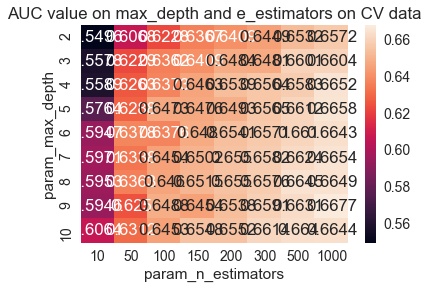

In [196]:
df_gridsearch = pd.DataFrame(model.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()

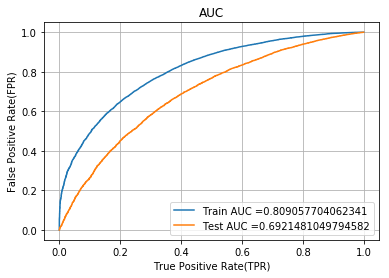

In [114]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 9,n_estimators=1000,random_state=0, class_weight='balanced')
model.fit(S_BOW_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, S_BOW_train)
y_test_pred = batch_predict(model, S_BOW_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [97]:
def prediction(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.5293709542900648 for threshold 0.499


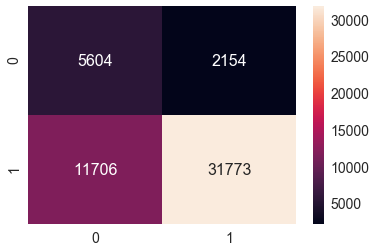

In [116]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confuision matrix for test data

the maximum value of tpr*(1-fpr) 0.5293709542900648 for threshold 0.499


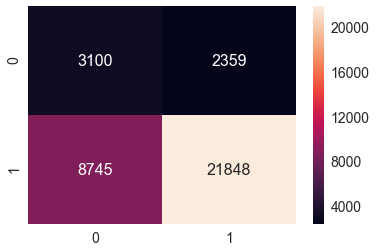

In [117]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# Feature set 2 USING TFIDF_Train

In [98]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_TFIDF_train= hstack((a1,b1,c1,d1,e1,text_tfidf_train,title_tfidf_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
S_TFIDF_train.shape

(11725, 29738)

In [99]:
S_TFIDF_test= hstack((a2,b2,c2,d2,e2,text_tfidf_test,title_tfidf_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
S_TFIDF_test.shape

(8250, 29738)

In [100]:
S_TFIDF_cv= hstack((a3,b3,c3,d3,e3 ,text_tfidf_cv,title_tfidf_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
S_TFIDF_cv.shape

(5025, 29738)

Finding best parameter using CV

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve

train_auc = []
cv_auc = []
train_auc_std = []
cv_auc_std = []

estimators = [10,50,100,150,200,300,500,1000]
depths = [2,3,4,5,6,7,8,9,10]

param_grid = {'n_estimators': estimators, 'max_depth':depths }
RFC = RandomForestClassifier()
model1 = GridSearchCV(RFC, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
model1.fit(S_TFIDF_train, y_train)
train_auc = model1.cv_results_['mean_train_score']
train_auc_std = model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']
print("Model with best parameters :\n",model1.best_estimator_)

Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Finding best hyperparameter using GridSearchCV

In [184]:
best_depth = model1.best_estimator_.max_depth
print(best_depth)

10


In [186]:
best_estimator = model1.best_estimator_.n_estimators
print(best_estimator)

1000


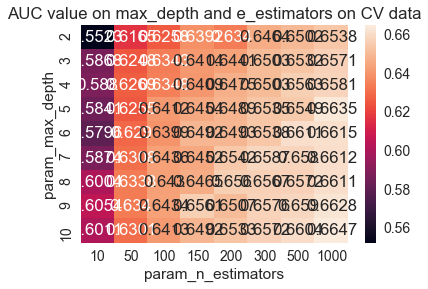

In [190]:
df_gridsearch = pd.DataFrame(model1.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()

Max_AUC=0.66,Max_depth=10,n_estimators=1000

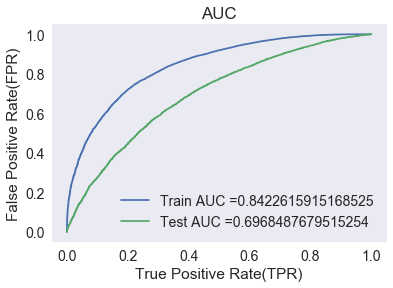

In [187]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth=10,n_estimators=1000,random_state=0, class_weight='balanced')
model.fit(S_TFIDF_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model1, S_TFIDF_train)
y_test_pred = batch_predict(model1, S_TFIDF_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.5805688843892902 for threshold 0.504


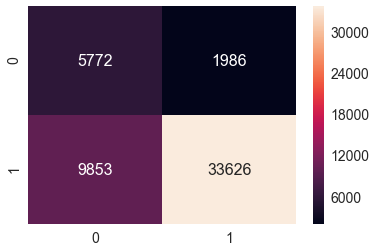

In [188]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.5805688843892902 for threshold 0.504


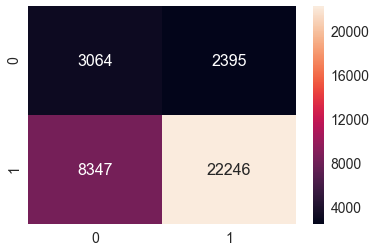

In [189]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# Feature set 3 USING AVG_W2V


In [101]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_avgw2v_train= hstack((a1,b1,c1,d1,e1,avg_w2v_vectors_train,avg_w2v_title_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(S_avgw2v_train.shape)




(11725, 619)


In [102]:
S_avgw2v_test= hstack((a2,b2,c2,d2,e2,avg_w2v_vectors_test,avg_w2v_title_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(S_avgw2v_test.shape)



(8250, 619)


In [103]:
S_avgw2v_cv= hstack((a3,b3,c3,d3,e3,avg_w2v_vectors_cv,avg_w2v_title_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
print(S_avgw2v_cv.shape)

(5025, 619)


FINDING BEST HYPERPARAMETER USING CV

FINDING BEST HYPERPARAMETER USING GRIDSEARCHCV

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve

train_auc = []
cv_auc = []
train_auc_std = []
cv_auc_std = []

estimators = [10,50,100,150,200,300,500,1000]
depths = [2,3,4,5,6,7,8,9,10]

param_grid = {'n_estimators': estimators, 'max_depth':depths }
RFC = RandomForestClassifier()
model2 = GridSearchCV(RFC, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
model2.fit(S_avgw2v_train, y_train)
train_auc = model2.cv_results_['mean_train_score']
train_auc_std = model2.cv_results_['std_train_score']
cv_auc = model2.cv_results_['mean_test_score'] 
cv_auc_std= model2.cv_results_['std_test_score']

print("Model with best parameters :\n",model2.best_estimator_)

Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


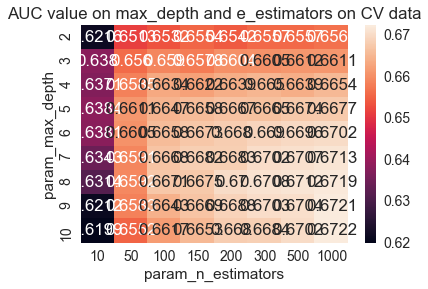

In [129]:
df_gridsearch = pd.DataFrame(model2.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()

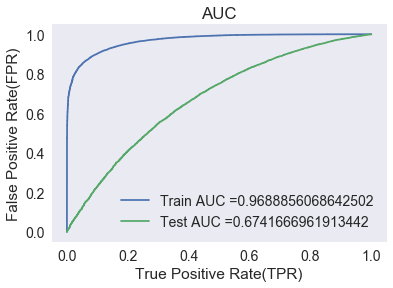

In [126]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model3 = RandomForestClassifier(max_depth = 10,n_estimators=1000,random_state=0, class_weight='balanced')
model3.fit(S_avgw2v_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model3, S_avgw2v_train)
y_test_pred = batch_predict(model3, S_avgw2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

CONFUSION MATRIX FOR TRAIN DATA

the maximum value of tpr*(1-fpr) 0.8155078270088588 for threshold 0.52


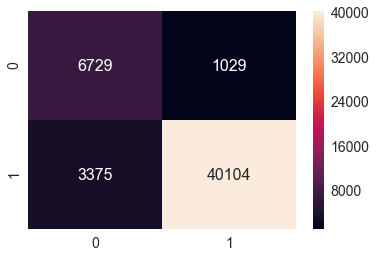

In [127]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

CONFUSION MATRIX FOR TEST DATA

the maximum value of tpr*(1-fpr) 0.8155078270088588 for threshold 0.52


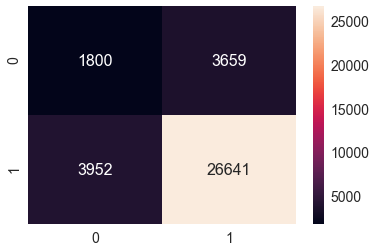

In [128]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# FEATURE SET 4:TFIDF_W2V

In [104]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
S_tfidf_w2v_train= hstack((a1,b1,c1,d1,e1,tfidf_w2v_vectors_train,tfidf_w2v_ppt_train,price_standardized_train,prev_project_standardized_train,quantity_standardized_train,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train)).tocsr()
print(S_tfidf_w2v_train.shape)

S_tfidf_w2v_test= hstack((a2,b2,c2,d2,e2,tfidf_w2v_vectors_test,tfidf_w2v_ppt_test,price_standardized_test,prev_project_standardized_test,quantity_standardized_test,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test)).tocsr()
print(S_tfidf_w2v_test.shape)

S_tfidf_w2v_cv= hstack((a3,b3,c3,d3,e3,tfidf_w2v_vectors_cv,tfidf_w2v_ppt_cv,price_standardized_cv,prev_project_standardized_cv,quantity_standardized_cv,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv)).tocsr()
print(S_tfidf_w2v_cv.shape)



(11725, 619)
(8250, 619)
(5025, 619)


Using CV to find best hyperparameter

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve

train_auc = []
cv_auc = []
train_auc_std = []
cv_auc_std = []

estimators = [10,50,100,150,200,300,500,1000]
depths = [2,3,4,5,6,7,8,9,10]

param_grid = {'n_estimators': estimators, 'max_depth':depths }
RFC = RandomForestClassifier()
model3 = GridSearchCV(RFC, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
model3.fit(S_tfidf_w2v_train, y_train)
train_auc = model3.cv_results_['mean_train_score']
train_auc_std = model3.cv_results_['std_train_score']
cv_auc = model3.cv_results_['mean_test_score'] 
cv_auc_std= model3.cv_results_['std_test_score']

print("Model with best parameters :\n",model3.best_estimator_)

Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Using GridsearchCV to find best hyperparameter

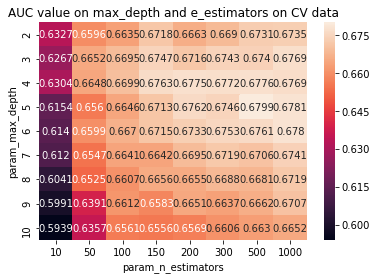

In [121]:
df_gridsearch = pd.DataFrame(model3.cv_results_)
max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on CV data')
plt.show()

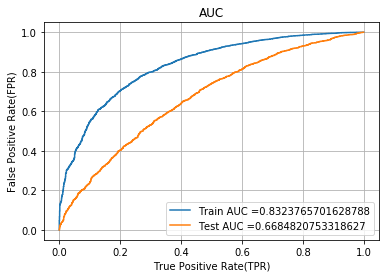

In [123]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model4 = RandomForestClassifier(max_depth = 5,n_estimators=500,random_state=0, class_weight='balanced')
model4.fit(S_tfidf_w2v_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model4,S_tfidf_w2v_train)
y_test_pred = batch_predict(model4, S_tfidf_w2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.5699321417071109 for threshold 0.491


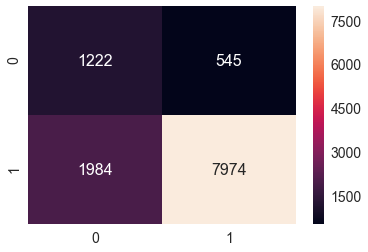

In [124]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

CONFUSION MATRIX FOR TEST DATA

the maximum value of tpr*(1-fpr) 0.5699321417071109 for threshold 0.491


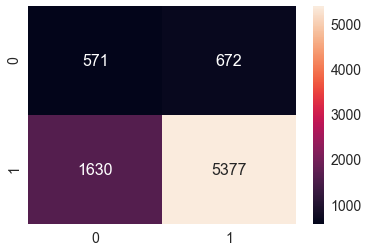

In [125]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# XGBOOST with BOW

In [107]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [127]:

estimators = [10,50,100,150,200,300,500,1000]
Depths = [2,3,4,5,6,7,8,9,10]

param_grid = {'n_estimators': estimators, 'max_depth':Depths }
XGB = XGBClassifier(booster='gbtree')
xgb1 = GridSearchCV(XGB, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
xgb1.fit(S_BOW_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch=2, refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

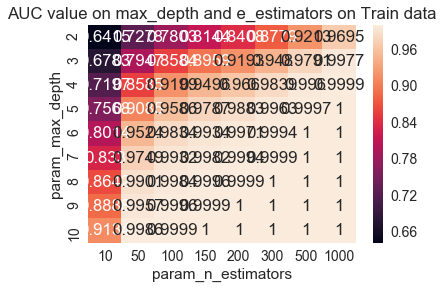

In [132]:
df_gridsearch1 = pd.DataFrame(xgb1.cv_results_)
max_scores1 = df_gridsearch1.groupby(['param_max_depth','param_n_estimators']).max()
max_scores1 = max_scores1.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores1.mean_train_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on Train data')
plt.show()

from heat map we can see we get max AUC value at best depth=3 and n_estimator=100

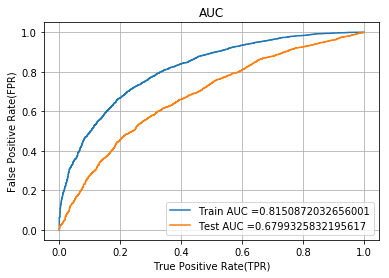

In [108]:
from sklearn.metrics import roc_curve, auc
clf_1 = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100)
clf_1.fit(S_BOW_train,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(clf_1,S_BOW_train)
y_test_pred = batch_predict(clf_1, S_BOW_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.5452355467382929 for threshold 0.835


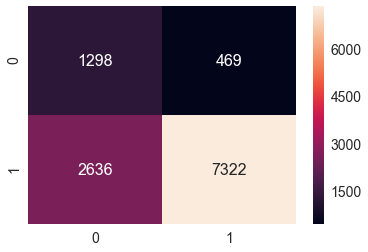

In [109]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.5452355467382929 for threshold 0.835


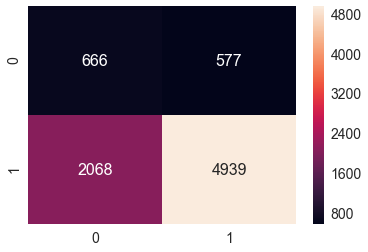

In [110]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# XGBOOST FOR TFIDF

In [108]:
estimators = [10,50,100,150,200,300,500,1000]
Depths = [2,3,4,5,6,7,8,9,10]
param_grid = {'n_estimators': estimators, 'max_depth':Depths }
XGB = XGBClassifier(booster='gbtree')
xgb2 = GridSearchCV(XGB, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
xgb2.fit(S_TFIDF_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch=2, refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

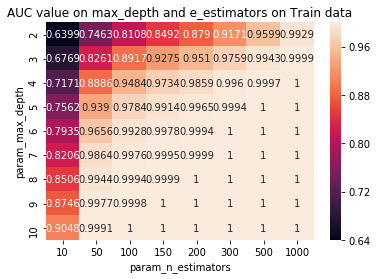

In [111]:
df_gridsearch1 = pd.DataFrame(xgb2.cv_results_)
max_scores1 = df_gridsearch1.groupby(['param_max_depth','param_n_estimators']).max()
max_scores1 = max_scores1.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores1.mean_train_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on Train data')
plt.show()

from heat map we can see we get max AUC value at best depth=3 and n_estimator=100

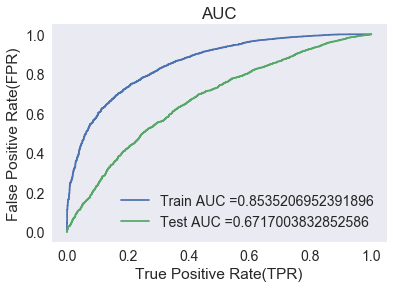

In [111]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf_2 = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100)
clf_2.fit(S_TFIDF_train,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(clf_2,S_TFIDF_train)
y_test_pred = batch_predict(clf_2, S_TFIDF_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.5913520998720945 for threshold 0.831


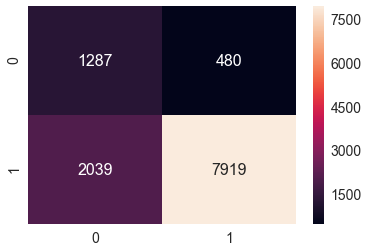

In [112]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.5913520998720945 for threshold 0.831


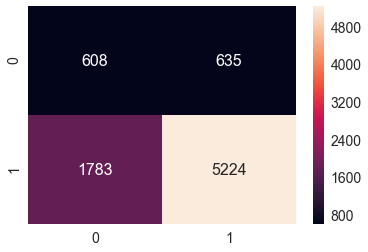

In [113]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# XGBOOST FOR AVG_W2V

In [ ]:
Grid search

In [112]:
estimators = [10,50,100,150,200,300,500,1000]
Depths = [2,3,4,5,6,7,8,9,10]
param_grid = {'n_estimators': estimators, 'max_depth':Depths }
XGB = XGBClassifier(booster='gbtree')
xgb3 = GridSearchCV(XGB, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
xgb3.fit(S_avgw2v_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch=2, refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Heat map

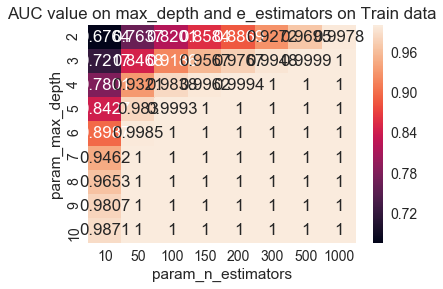

In [122]:
df_gridsearch1 = pd.DataFrame(xgb3.cv_results_)
max_scores1 = df_gridsearch1.groupby(['param_max_depth','param_n_estimators']).max()
max_scores1 = max_scores1.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores1.mean_train_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on Train data')
plt.show()

from heat map we can see we get max AUC value at best depth=3 and n_estimator=100

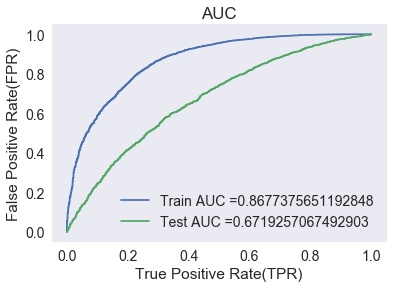

In [114]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf_4 = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100)
clf_4.fit(S_avgw2v_train,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(clf_4,S_avgw2v_train)
y_test_pred = batch_predict(clf_4,S_avgw2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.6156967924024537 for threshold 0.848


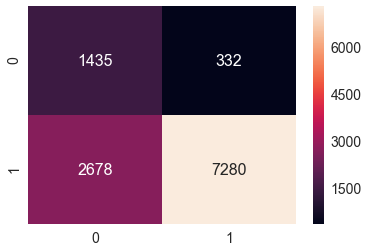

In [115]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.6156967924024537 for threshold 0.848


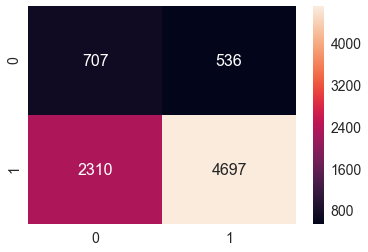

In [116]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

# XGBOOST FOR TFIDF_W2V

In [133]:
estimators = [10,50,100,150,200,300,500,1000]
Depths = [2,3,4,5,6,7,8,9,10]
param_grid = {'n_estimators': estimators, 'max_depth':Depths }
XGB = XGBClassifier(booster='gbtree')
xgb4 = GridSearchCV(XGB, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1,pre_dispatch=2)
xgb4.fit(S_tfidf_w2v_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch=2, refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

PERFORMING GRID SEARCH

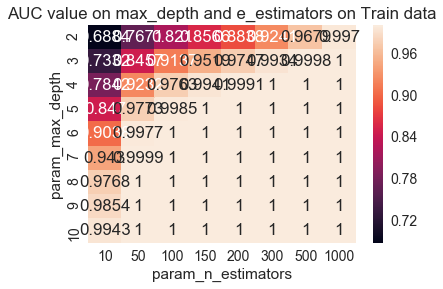

In [134]:
df_gridsearch1 = pd.DataFrame(xgb4.cv_results_)
max_scores1 = df_gridsearch1.groupby(['param_max_depth','param_n_estimators']).max()
max_scores1 = max_scores1.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores1.mean_train_score, annot=True, fmt='.4g')
plt.title('AUC value on max_depth and e_estimators on Train data')
plt.show()

from heat map we can see we get max AUC value at best depth=3 and n_estimator=100

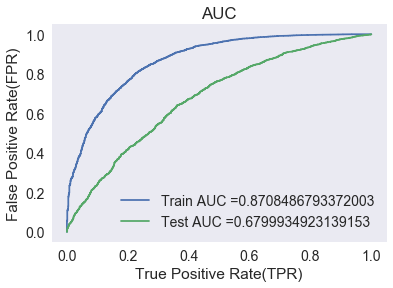

In [117]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf_4 = XGBClassifier(booster='gbtree',max_depth=3,n_estimators=100)
clf_4.fit(S_tfidf_w2v_train,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(clf_4, S_tfidf_w2v_train)
y_test_pred = batch_predict(clf_4, S_tfidf_w2v_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

CONFUSION MATRIX FOR TRAIN DATA

the maximum value of tpr*(1-fpr) 0.6215320531859162 for threshold 0.837


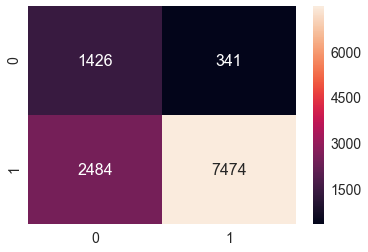

In [118]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

CONFUSION MATRIX FOR TEST DATA

the maximum value of tpr*(1-fpr) 0.6215320531859162 for threshold 0.837


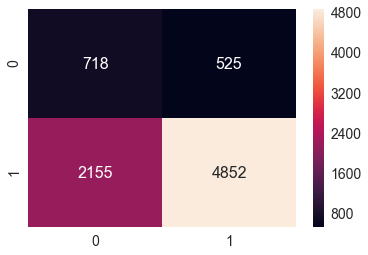

In [119]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, prediction(y_test_pred, tr_thresholds,
train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

In [120]:
from prettytable import PrettyTable
p= PrettyTable()
v1 = "BOW"
v2 = "TFIDF"
v3 = "AVG-W2V"
v4 = "TFIDF-W2V"
m1 = 'Random Forest'
m2 = 'GBDT-XGBOOST'
p.field_names = ["Vectorizer","Model","best_Depth","base_learners"," AUC"]
p.add_row([v1,m1,9,1000,0.6677])
p.add_row([v2,m1,10,1000,0.6647])
p.add_row([v3,m1,10,1000,0.6672])
p.add_row([v4,m1,5,500,0.6799])
p.add_row([v1,m2,3,100,0.7858])
p.add_row([v2,m2,3,100,0.8917])
p.add_row([v3,m2,3,100,0.8913])
p.add_row([v4,m2,3,100,0.7913])
print(p)

+------------+---------------+------------+---------------+--------+
| Vectorizer |     Model     | best_Depth | base_learners |   AUC  |
+------------+---------------+------------+---------------+--------+
|    BOW     | Random Forest |     9      |      1000     | 0.6677 |
|   TFIDF    | Random Forest |     10     |      1000     | 0.6647 |
|  AVG-W2V   | Random Forest |     10     |      1000     | 0.6672 |
| TFIDF-W2V  | Random Forest |     5      |      500      | 0.6799 |
|    BOW     |  GBDT-XGBOOST |     3      |      100      | 0.7858 |
|   TFIDF    |  GBDT-XGBOOST |     3      |      100      | 0.8917 |
|  AVG-W2V   |  GBDT-XGBOOST |     3      |      100      | 0.8913 |
| TFIDF-W2V  |  GBDT-XGBOOST |     3      |      100      | 0.7913 |
+------------+---------------+------------+---------------+--------+


Conclusion:
    GBDT using XGBOOST works well as compared to Random forest as XGBOOST has higher AUC value.